In [ ]:
import pandas as pd
df = pd.read_csv(r"K:\DA\netflix_titles.csv")  
print(df.head())
print(df.info())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
df = df.dropna(subset=['title', 'type'])

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

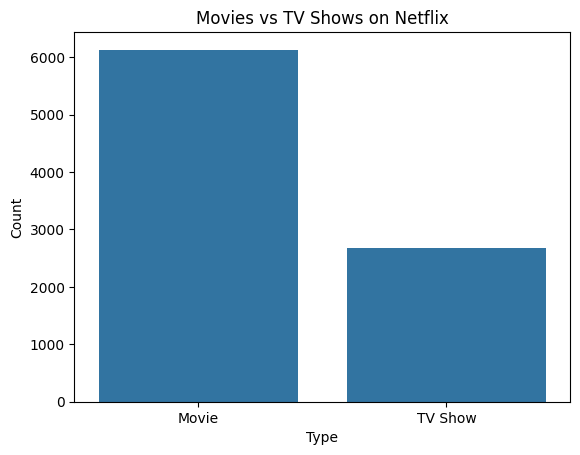

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

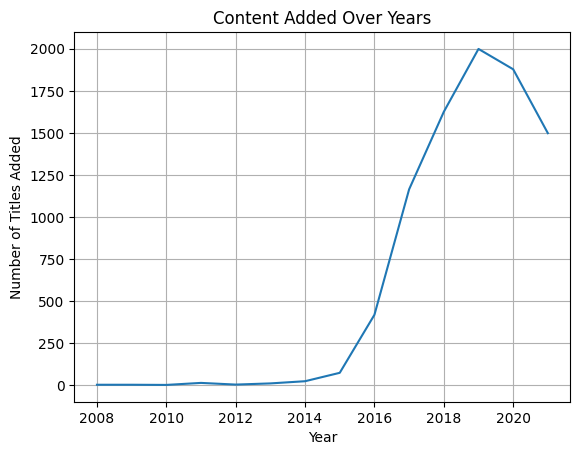

In [12]:
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


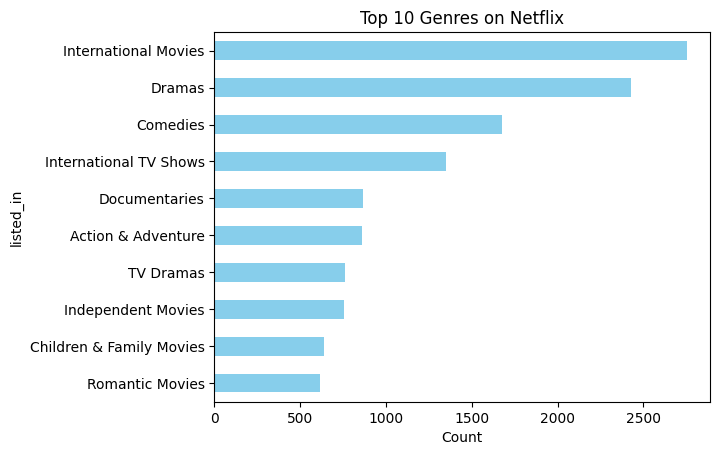

In [ ]:
all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = all_genres.explode()
top_genres = flat_genres.value_counts().head(10)
top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()


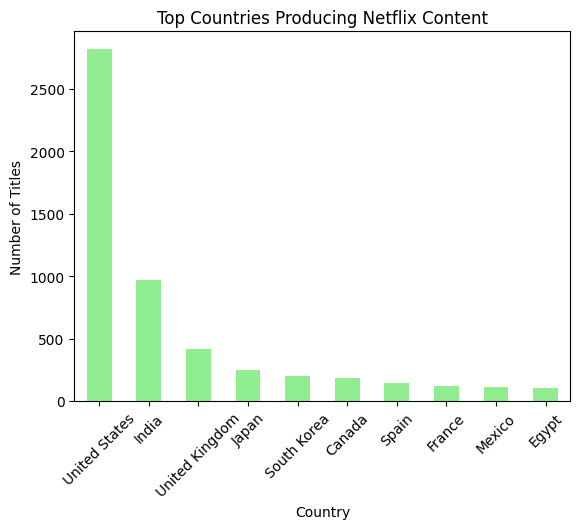

In [14]:
df['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


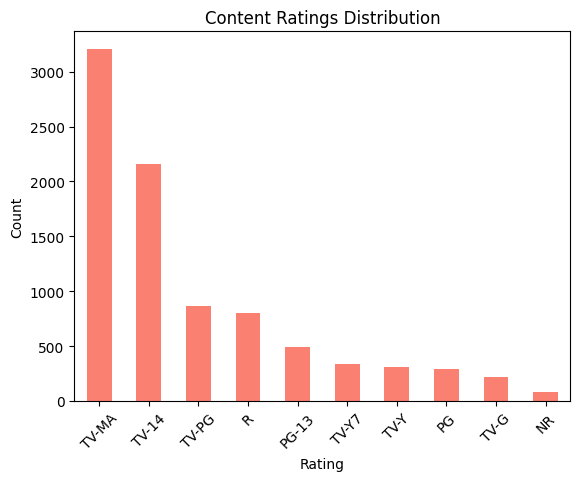

In [15]:
df['rating'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Content Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


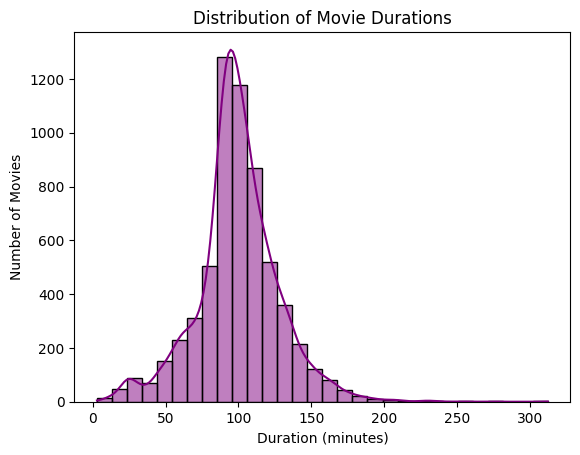

In [ ]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)
sns.histplot(df_movies['duration_int'], bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()
